Import Libraries

In [90]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import LabelEncoder,OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score,mean_absolute_error,mean_squared_error

Load and Explore Dataset

In [59]:
df = pd.read_csv('Regression dataset.csv')

In [60]:
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19.0,female,27.900,0.0,NaN,southwest,16884.92400
1,18.0,male,33.770,1.0,NaN,southeast,1725.55230
2,28.0,male,33.000,3.0,no,southeast,4449.46200
3,33.0,male,22.705,0.0,no,NaN,21984.47061
4,32.0,male,28.880,0.0,no,northwest,3866.85520


In [61]:
# check null values
df.isna().sum()

age          74
sex          63
bmi           0
children    146
smoker      139
region       69
charges       0
dtype: int64

In [62]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1264 non-null   float64
 1   sex       1275 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1192 non-null   float64
 4   smoker    1199 non-null   object 
 5   region    1269 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(4), object(3)
memory usage: 73.3+ KB


Filling missing values

In [63]:
num_missing_cols = ['age','children']
catg_missing_cols = ['sex','region','smoker']

In [64]:
num_impute = SimpleImputer(strategy='median')
catg_impute = SimpleImputer(strategy='most_frequent')

In [65]:
for col in num_missing_cols:
    df[col] = num_impute.fit_transform(df[[col]])

In [66]:
for col in catg_missing_cols:
    df[col] = catg_impute.fit_transform(df[[col]]).ravel()

In [67]:
# check null values after impute
df.isna().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [68]:
# check duplicates
print(f'Duplicates in this dataset = {df.duplicated().sum()}')

Duplicates in this dataset = 1


In [69]:
# drop duplicates
df = df.drop_duplicates()

In [70]:
# check duplicates after 
print(f'Duplicates in this dataset = {df.duplicated().sum()}')

Duplicates in this dataset = 0


Encode Catg cols

In [71]:
catg_cols = df.select_dtypes(include='object').columns.to_list()
catg_cols

['sex', 'smoker', 'region']

In [72]:
l_encoder = LabelEncoder()
oh_encoder = OneHotEncoder()

In [73]:
for col in ['sex', 'smoker']:
    df[col] = l_encoder.fit_transform(df[col])

In [74]:
encoded_df = oh_encoder.fit_transform(df[['region']])
encoded_df = pd.DataFrame(oh_encoder.fit_transform(df[['region']]).toarray(),columns=oh_encoder.get_feature_names_out(['region']))

In [75]:
encoded_df

,region_northeast,region_northwest,region_southeast,region_southwest
0,0.0,0.0,0.0,1.0
1,0.0,0.0,1.0,0.0
2,0.0,0.0,1.0,0.0
3,0.0,0.0,1.0,0.0
4,0.0,1.0,0.0,0.0
...,...,...,...,...
1332,0.0,1.0,0.0,0.0
1333,1.0,0.0,0.0,0.0
1334,0.0,0.0,1.0,0.0
1335,0.0,0.0,0.0,1.0


In [76]:
# concat
df = df.drop(columns=['region'] , axis=1 ,errors='ignore')
df = pd.concat([df , encoded_df] , axis=1)
df = df.dropna()
df

,age,sex,bmi,children,smoker,charges,region_northeast,region_northwest,region_southeast,region_southwest
0,19.0,0.0,27.900,0.0,0.0,16884.92400,0.0,0.0,0.0,1.0
1,18.0,1.0,33.770,1.0,0.0,1725.55230,0.0,0.0,1.0,0.0
2,28.0,1.0,33.000,3.0,0.0,4449.46200,0.0,0.0,1.0,0.0
3,33.0,1.0,22.705,0.0,0.0,21984.47061,0.0,0.0,1.0,0.0
4,32.0,1.0,28.880,0.0,0.0,3866.85520,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...
1332,52.0,0.0,44.700,3.0,0.0,11411.68500,0.0,1.0,0.0,0.0
1333,50.0,1.0,30.970,3.0,0.0,10600.54830,1.0,0.0,0.0,0.0
1334,18.0,0.0,31.920,0.0,0.0,2205.98080,0.0,0.0,1.0,0.0
1335,18.0,0.0,36.850,0.0,0.0,1629.83350,0.0,0.0,0.0,1.0


In [77]:
df.isna().sum()

age                 0
sex                 0
bmi                 0
children            0
smoker              0
charges             0
region_northeast    0
region_northwest    0
region_southeast    0
region_southwest    0
dtype: int64

Data Split Process

In [78]:
X = df.drop(['charges'],axis=1)
y = df[['charges']]

In [79]:
X_train , X_test , y_train , y_test = train_test_split(X , y ,test_size=0.2 , random_state=42)

Create Linear Regression model

In [80]:
lr_model = LinearRegression()

In [81]:
# fit model 
lr_model.fit(X_train , y_train)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [83]:
# make predictions
lr_pred = lr_model.predict(X_test)

Create Random Forest model

In [84]:
rf_model = RandomForestRegressor(random_state=42)

In [ ]:
# fit model
rf_model.fit(X_train , y_train)

c:\Users\Bassam\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:1365: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


,n_estimators,100
,criterion,'squared_error'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,1.0
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


In [ ]:
# make predictions
rf_pred = rf_model.predict(X_test)

Evaluate Models

In [87]:
print(f'R2_Score for Linear Regression model = {r2_score(y_test ,lr_pred)}')
print(f'R2_Score for Random Forest model = {r2_score(y_test ,rf_pred)}')

R2_Score for Linear Regression model = 0.7395959667112831
R2_Score for Random Forest model = 0.7758817665997938


In [88]:
print(f'MAE for Linear Regression model = {mean_absolute_error(y_test ,lr_pred)}')
print(f'MAE for Random Forest model = {mean_absolute_error(y_test ,rf_pred)}')

MAE for Linear Regression model = 4666.60816232753
MAE for Random Forest model = 3687.0362960876873


In [91]:
print(f'RMSE for Linear Regression model = {np.sqrt(mean_squared_error(y_test ,lr_pred))}')
print(f'RMSE for Random Forest model = {np.sqrt(mean_squared_error(y_test ,rf_pred))}')

RMSE for Linear Regression model = 6802.925291878324
RMSE for Random Forest model = 6311.178210520422


Visualize Predicted results VS. Actual results

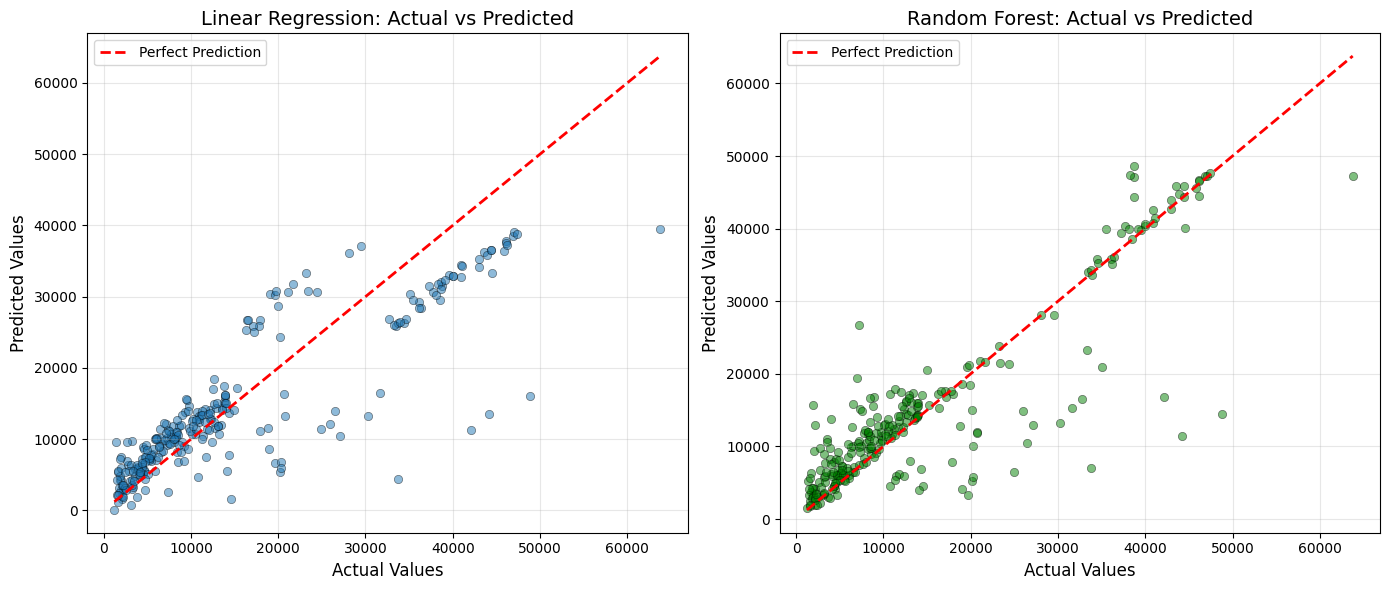

In [96]:
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

# Linear regression
axes[0].scatter(y_test, lr_pred, alpha=0.5, edgecolors='k', linewidth=0.5)
axes[0].plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 
             'r--', lw=2, label='Perfect Prediction')
axes[0].set_xlabel('Actual Values', fontsize=12)
axes[0].set_ylabel('Predicted Values', fontsize=12)
axes[0].set_title('Linear Regression: Actual vs Predicted', fontsize=14)
axes[0].legend()
axes[0].grid(True, alpha=0.3)

# Random forest
axes[1].scatter(y_test, rf_pred, alpha=0.5, color='green', edgecolors='k', linewidth=0.5)
axes[1].plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 
             'r--', lw=2, label='Perfect Prediction')
axes[1].set_xlabel('Actual Values', fontsize=12)
axes[1].set_ylabel('Predicted Values', fontsize=12)
axes[1].set_title('Random Forest: Actual vs Predicted', fontsize=14)
axes[1].legend()
axes[1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()